# <span style="color:#57a989">Práctica 3: Regresión</span>
**Materia:** Introducción a la Ciencia de Datos

**Elaborado por:** Eber David Gaytán Medina.

**Fuente:** https:

**Objetivo de la practica:**

El objetivo es predecir el valor de una casa dado un conjunto de variables predictoras.

## <span style="color:#57a989">Estructura del Análisis</span>
1. [Análisis exploratorio](#Análisis-exploratorio)
2. [Limpieza de datos](#Limpieza-de-datos)
3. [Una técnica de reducción de dimensionalidad](#)
4. [Selección de características](#)
5. [Modelos de regresión](#)
6. [Reporte de datos](#)
7. [Reporte de datos con datos prueba](#)
8. [Discución y conclusiones](#)

#### <span style="color:#57a989">Importar librerias</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy.stats import linregress
import seaborn as sns

#### <span style="color:#57a989">Cargar el dataset</span>

In [2]:
df = pd.read_csv(r'train_housing_data_italy.csv')

## <span style="color:#57a989">Análisis exploratorio</span>

In [3]:
df.head() # Se muestran los primeros 5 renglones del dataset

,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


**Observaciones**

Son 26 columnas, se puede ver una gran cantidad datos perdidos en la columna price. Al ser la columna "price" el objetivo de análisis, podriamos descartar aquellos valores nulos ya que no nos ayudaran a predecir los precios.

In [4]:
#Muestra los datos nulos y hace la suma de ellos por columna.

display(df.isnull().sum())

timestamp                   0
location                    0
title                       0
price                   37478
n_rooms                 57848
floor                   69102
mq                       3889
n_bathrooms             13804
year_of_construction       10
availability                0
energy_class              648
status                      0
heating                     0
has_garage                  0
has_terrace                 0
has_garden                  0
has_balcony                 0
has_fireplace               0
has_alarm                   0
has_air_conditioning        0
has_pool                    0
has_parking                 0
has_elevator                0
is_furnished                0
latitude                   60
longitude                  60
dtype: int64

In [5]:
# Hacer conteo de filas, columnas y la cantidad de missing values en el atributo objetivo.

filas, columnas = df.shape
pcentNaN = 100*37478/filas
print("Filas:", filas, "\nColumnas:", columnas, f"\nPorcentaje de datos perdidos en price: {pcentNaN:.2f}%")

Filas: 213409 
Columnas: 26 
Porcentaje de datos perdidos en price: 17.56%


**Observaciones**

Al hacer el conteo de valores perdidos se puede observar 37000 datos perdidos en el atributo target son el 17.56%, se podría rellenar con el promedio o la media, pero por razones de entrenamiento sería mejor separarlos y después analizarlos de manera separada una vez hecho el modelo.

In [6]:
# Muestra la suma de datos duplicados en el dataframe

display(df.duplicated().sum())  

822

**Observaciones**

Son 882 filas exactamente iguales que podrían ser valores duplicados.

In [7]:
# Muestra la ingormación general del los datos del dataframe

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

None

In [8]:
# Muestra la diversidad de datos que existen en el dataframe

display(df.nunique())

timestamp                42196
location                  7023
title                   190951
price                     2785
n_rooms                      4
floor                       22
mq                         976
n_bathrooms                  3
year_of_construction       387
availability                 1
energy_class                12
status                       1
heating                      2
has_garage                   2
has_terrace                  2
has_garden                   2
has_balcony                  2
has_fireplace                2
has_alarm                    2
has_air_conditioning         2
has_pool                     2
has_parking                  2
has_elevator                 2
is_furnished                 2
latitude                  7009
longitude                 7011
dtype: int64

**Observaciones**

Se tienen 6 datos tipo objeto:  
1. **Location:** Con 7023 diferentes localizaciones.  
2. **Title:** Es una etiqueta distinta para casi todos los datos.  
3. **Availability:** Solo tiene un valor y podría deberse a que todas las casas están habitadas.  
4. **Energy_class:** Tiene 12 maneras de suministro de energía, podría ser una variable categórica importante.  
5. **Status:** Solo tiene un valor "other".  
6. **Heating:** Tiene 2 valores y al tratarse de como se suministra calor a las casas podría haber una correlación con el precio de estas.  

In [9]:
# Agrupar por localización y calcular el precio promedio
precio_por_zona = df.groupby('location')['price'].mean().reset_index()

# Ordenar para ver las zonas más caras
precio_por_zona = precio_por_zona.sort_values(by='price', ascending=False)

# Mostrar el resultado
precio_por_zona

,location,price
2524,forte dei marmi,1.363942e+08
2950,isola del liri,2.575204e+07
5322,san benedetto del tronto,9.270545e+06
2742,gioia tauro,8.480333e+06
2165,crognaleto,7.245400e+06
...,...,...
5160,rombiolo,NaN
5450,san lorenzo del vallo,NaN
5787,sassano,NaN
5849,scido,NaN


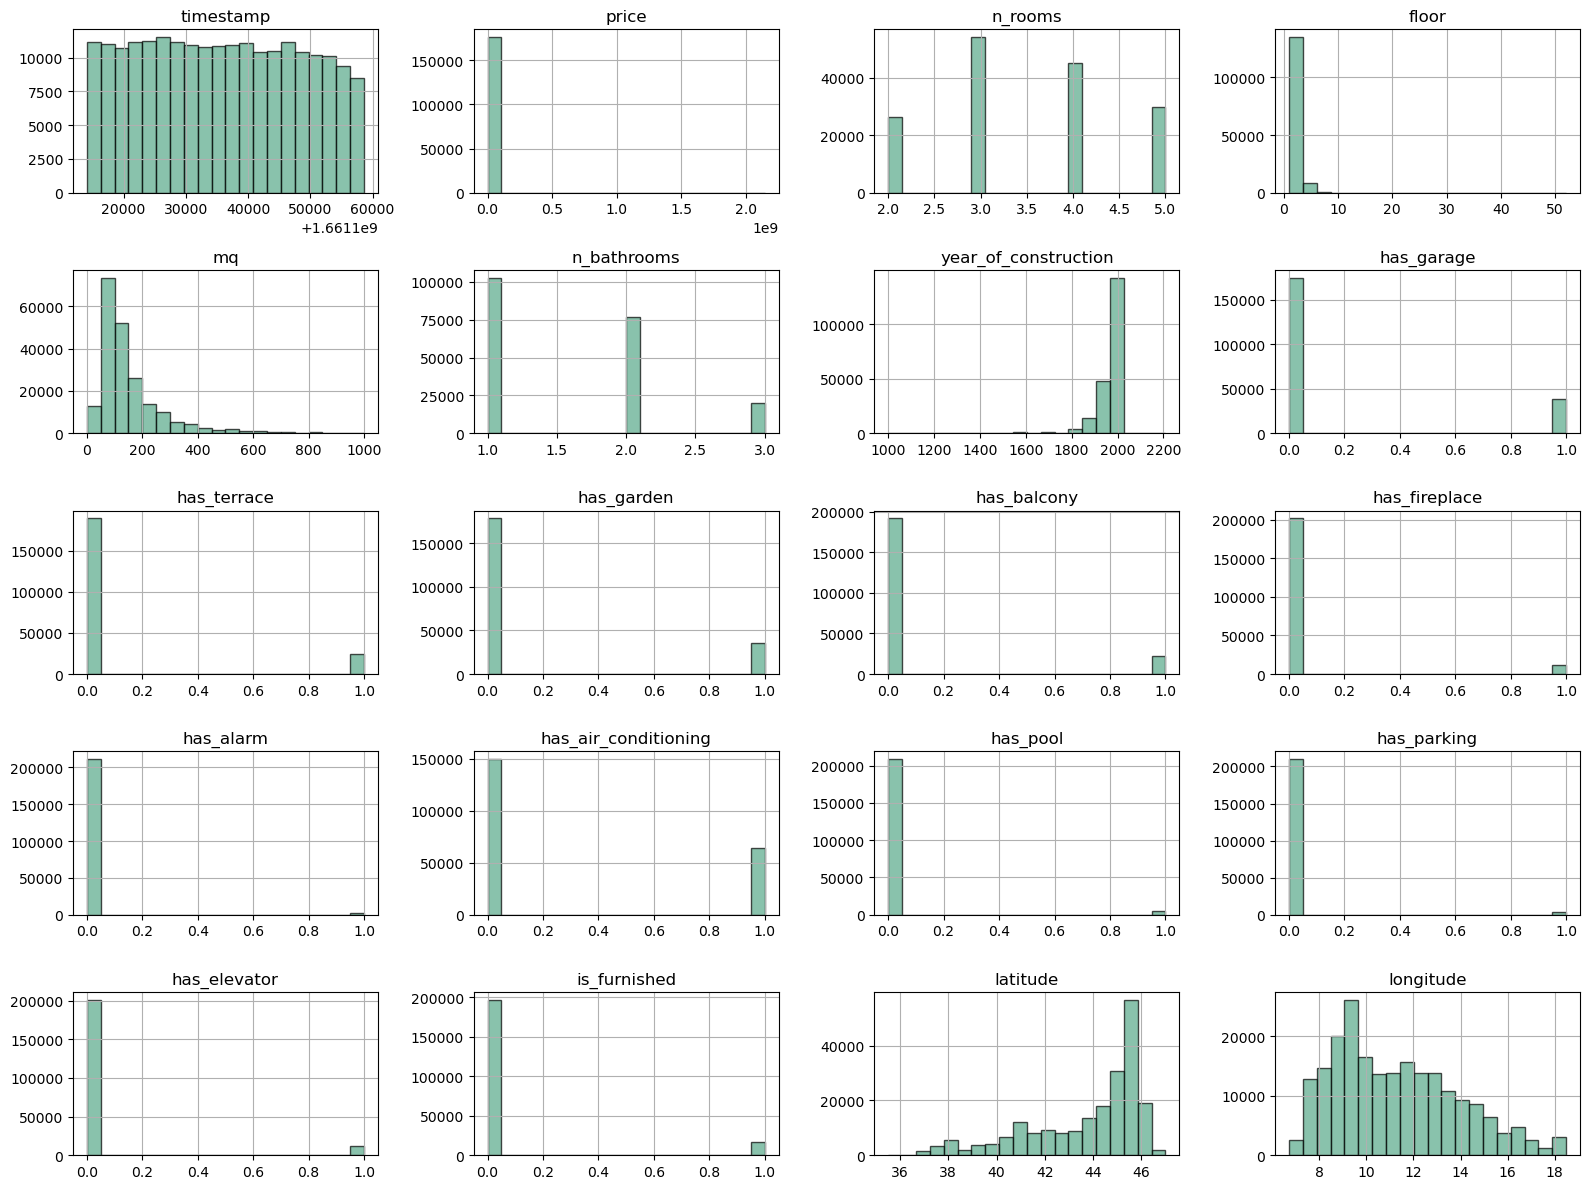

In [10]:
df.hist(bins=20, figsize=(16, 12), color='#57a989', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

In [11]:
display(df.describe())

,timestamp,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
count,2.134090e+05,1.759310e+05,155561.000000,144307.000000,209520.000000,199605.000000,213399.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213409.000000,213349.000000,213349.000000
mean,1.661136e+09,2.413253e+05,3.503442,1.820466,158.692311,1.587751,1965.096462,0.180292,0.111809,0.164881,0.101992,0.054304,0.009137,0.298549,0.021513,0.015548,0.056933,0.077574,43.743871,11.246385
std,1.266113e+04,7.739356e+06,0.985594,1.134597,128.708312,0.668113,76.663750,0.384432,0.315132,0.371074,0.302638,0.226617,0.095152,0.457623,0.145086,0.123717,0.231715,0.267501,2.356610,2.630608
min,1.661114e+09,1.000000e+00,2.000000,1.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.511134,6.703205
25%,1.661125e+09,7.700000e+04,3.000000,1.000000,80.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.229257,9.131355
50%,1.661136e+09,1.350000e+05,3.000000,2.000000,118.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.749384,10.847028
75%,1.661146e+09,2.350000e+05,4.000000,2.000000,189.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.575651,13.047569
max,1.661159e+09,2.147484e+09,5.000000,52.000000,999.000000,3.000000,2209.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.003740,18.492161


<Axes: >

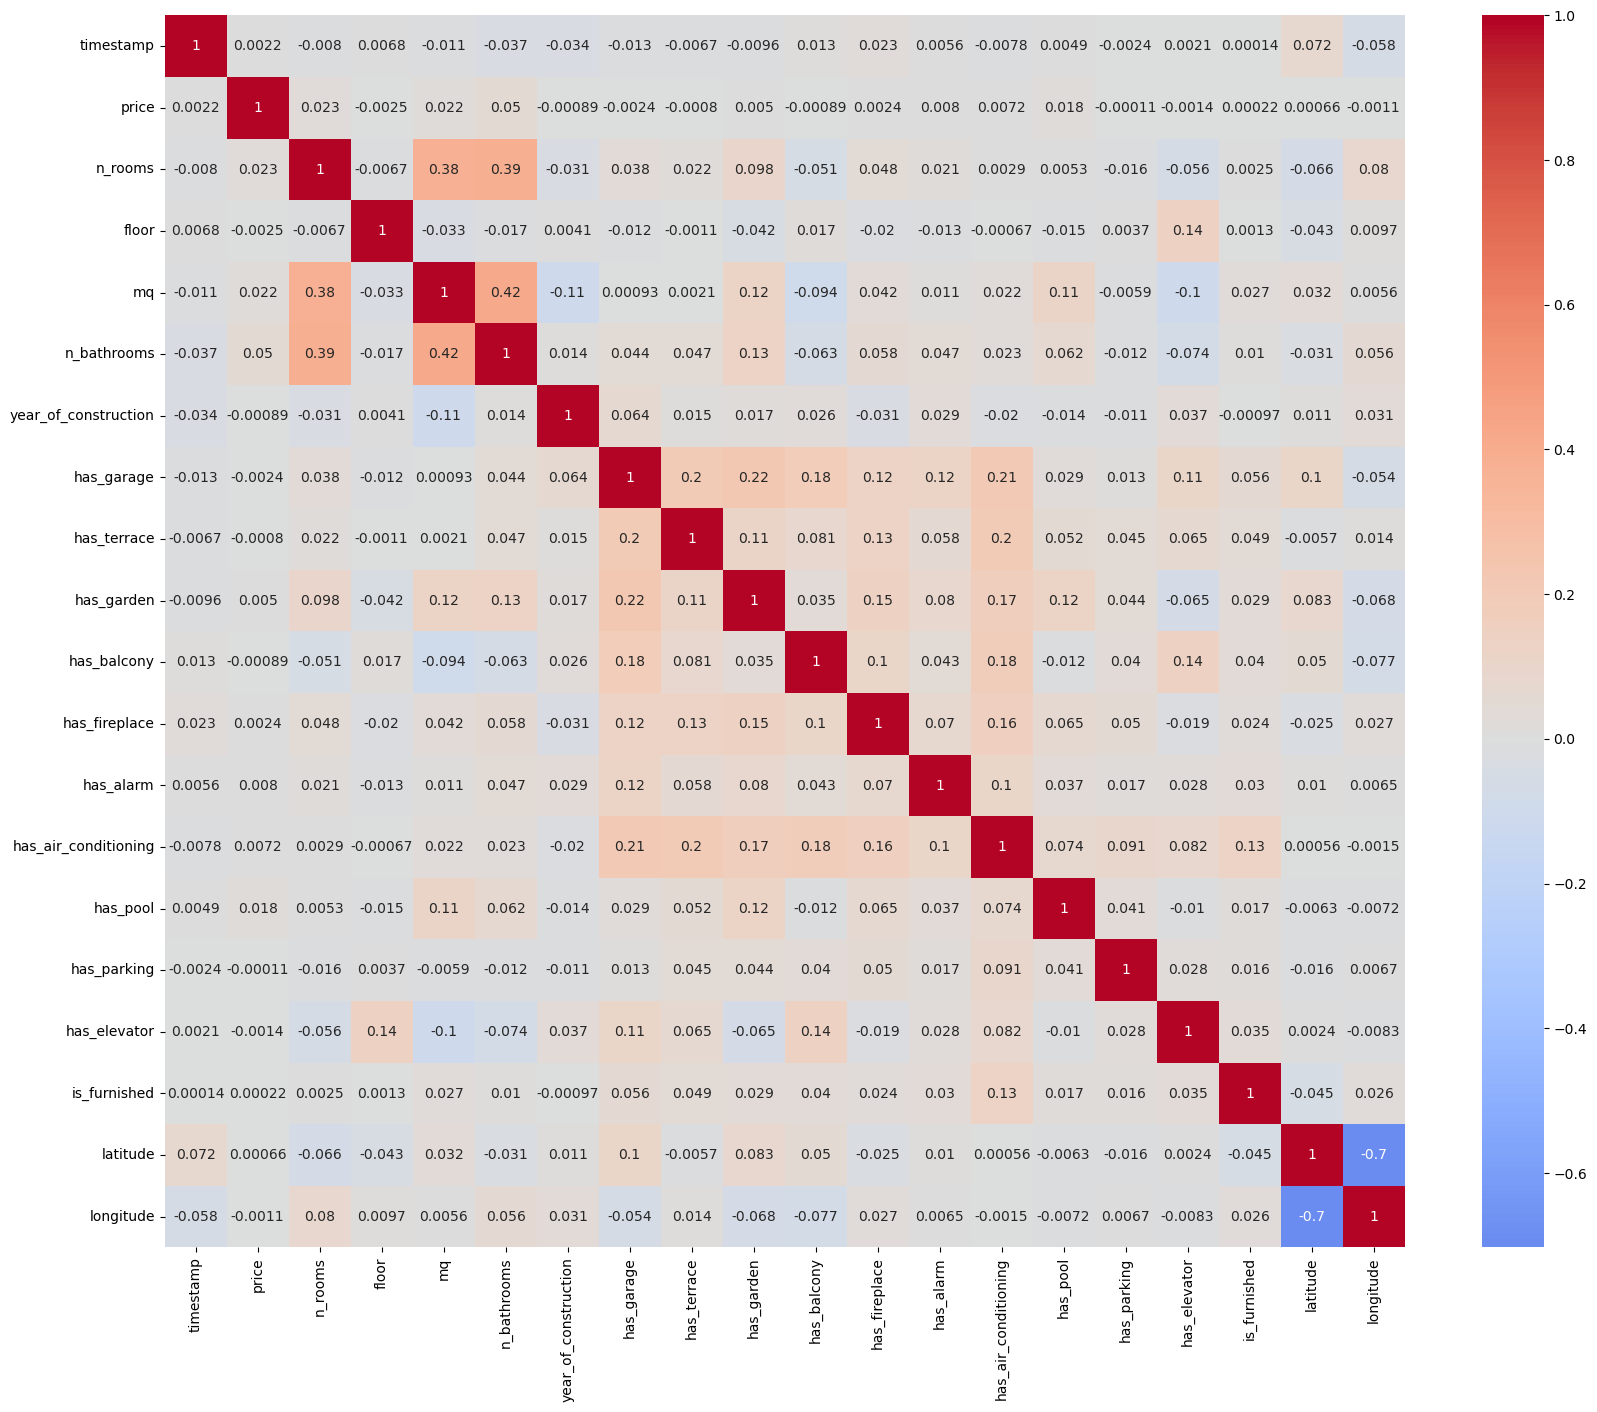

In [12]:
# Crear una matriz de correlación para el conjunto de datos "tips"
correlation_matrix = df.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 16))  # Ajustar el tamaño de la figura (ancho, alto)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, annot_kws={"fontsize": 10})

## <span style="color:#57a989">Limpieza de datos</span>

In [13]:
# Eliminar los datos duplicados.
df_clean = df.drop_duplicates()

# Eliminar los valores anomalos donde el valor de las casas es menos a 10k.
df_clean = df_clean[df_clean['price'] >= 10000].copy()

# Observar los minimos para verificar
print(df_clean[['price']].describe())

              price
count  1.750290e+05
mean   2.420632e+05
std    7.759252e+06
min    1.000000e+04
25%    7.800000e+04
50%    1.350000e+05
75%    2.350000e+05
max    2.147484e+09


**Observaciones**

Se eliminan los duplicados que son un porcentaje muy pequeño pero irrelevante.

Se eliminan los valores anomalos inferiores.

In [14]:
from datetime import datetime

# Se cambia el formato de datestamp para verificar la relacion de tiempos.
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Extraer el año
df['year'] = df['timestamp'].dt.year

In [15]:
# Mostrar las primeras filas del dataframe
display(df[['timestamp', 'year']].tail(20))

,timestamp,year
213389,2022-08-22 08:56:54,2022
213390,2022-08-22 08:56:54,2022
213391,2022-08-22 08:56:55,2022
213392,2022-08-22 08:56:55,2022
213393,2022-08-22 08:56:55,2022
213394,2022-08-22 08:56:55,2022
213395,2022-08-22 08:56:56,2022
213396,2022-08-22 08:56:56,2022
213397,2022-08-22 08:56:56,2022
213398,2022-08-22 08:56:56,2022


**Observaciones**

No hay correlación con los precios ya que todos los datos fueron adquiridos el mismo año, y en un intervalo de horas por lo tanto se descarta encontrar un nuevo atributo.

In [16]:
# Almacenar los renglones con missing values en price para su posterior uso en otro dataframe.
df_prueba = df[df['price'].isnull()]

# Limpia los renglones con valores null de todo el data frame
df_clean = df_clean.dropna(subset=['price'])

In [17]:
df_clean = df_clean.drop(columns=['status', 'heating', 'availability', 'longitude', 'latitude','timestamp','title'])
df_clean = df_clean[df_clean['price'] <= 370000000].copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

# Proceso para codificar los datos categoricos.
df_clean_en = df_clean.copy()  # Crear una copia para no modificar el original

# Inicializar LabelEncoder.
label_encoder = LabelEncoder()

# Lista de columnas categóricas para transformar.
categorical_columns = ['location', 'energy_class']

# Aplicar LabelEncoder a cada columna categórica en df_clean_en.
for column in categorical_columns:
    df_clean_en[column] = label_encoder.fit_transform(df_clean_en[column])

# Mostrar el nuevo dataframe transformado
print(df_clean_en.head())

   location     price  n_rooms  floor     mq  n_bathrooms  \
0      5960   46000.0      4.0    NaN   85.0          2.0   
1      6142  120000.0      4.0    2.0  190.0          2.0   
2      6973   55000.0      2.0    NaN   85.0          1.0   
3      6853  130000.0      4.0    NaN  319.0          1.0   
4      6600   30000.0      NaN    NaN  143.0          2.0   

   year_of_construction  energy_class  has_garage  has_terrace  has_garden  \
0                   NaN            12           0            0           0   
1                   NaN             4           0            0           0   
2                   NaN            11           0            0           1   
3                   NaN            11           0            0           0   
4                   NaN            11           0            0           0   

   has_balcony  has_fireplace  has_alarm  has_air_conditioning  has_pool  \
0            0              0          0                     0         0   
1           

In [19]:
df_clean_en_noNaN = df_clean_en.dropna(subset=['year_of_construction', 'energy_class','mq','n_bathrooms'])

# Crear un nuevo dataframe basado en df_clean_en.
df_clean_en_noNaN_med = df_clean_en_noNaN.copy()

# Rellenar con valor 1 que es la mediana "piso".
df_clean_en_noNaN_med['floor'] = df_clean_en_noNaN_med['floor'].fillna(1)

# Eliminar a todos los datos con null en año de contruccion.
df_clean = df_clean.dropna(subset=['year_of_construction'])

# Reemplazar los valores nulos con la media de las columnas numéricas y asignarlo de nuevo.
df_clean_en_noNaN_med = df_clean_en_noNaN_med.fillna(df_clean_en_noNaN_med.mean())

In [20]:
display(df_clean_en_noNaN_med.isnull().sum())

location                0
price                   0
n_rooms                 0
floor                   0
mq                      0
n_bathrooms             0
year_of_construction    0
energy_class            0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
dtype: int64

In [21]:
display(df_clean.head())

,location,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,energy_class,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished
10,zumpano,90000.0,5.0,2.0,124.0,2.0,2002.0,e,0,0,0,0,0,0,0,0,0,0,1
13,zumpano,59000.0,4.0,3.0,127.0,1.0,2001.0,d,0,0,0,0,1,0,1,0,0,1,0
15,zafferana etnea,65000.0,2.0,3.0,45.0,1.0,1950.0,g,0,0,0,0,0,0,0,0,0,0,0
16,zafferana etnea,120000.0,2.0,3.0,45.0,1.0,1900.0,g,0,0,0,0,1,0,0,0,1,0,0
17,vinchiaturo,22000.0,2.0,3.0,70.0,1.0,1900.0,g,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

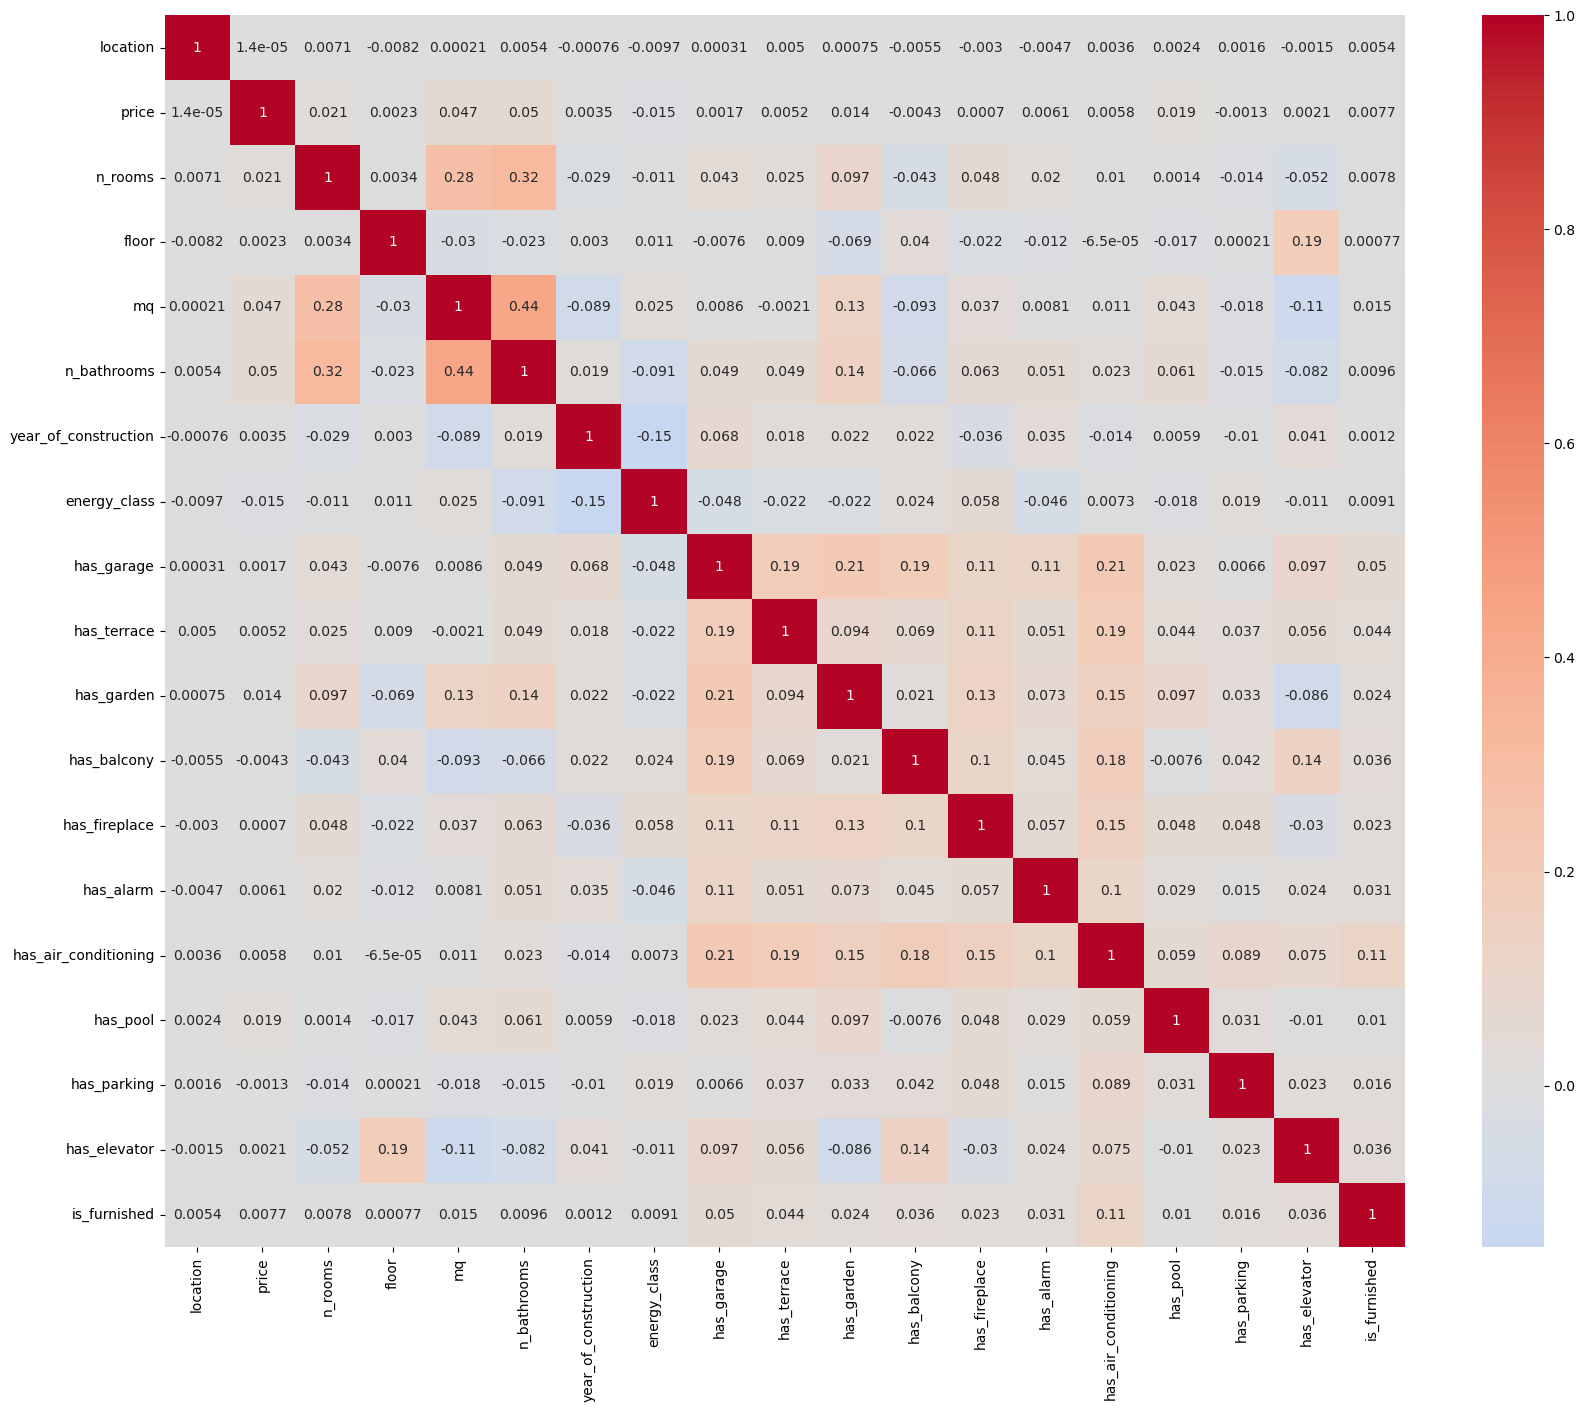

In [22]:
# Crear una matriz de correlación para el conjunto de datos "tips"
correlation_matrix = df_clean_en_noNaN_med.corr()
# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 16))  # Ajustar el tamaño de la figura (ancho, alto)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, annot_kws={"fontsize": 10})

### <span style="color:#57a989">Extracción de características</span>

In [23]:
# Seleccionar las columnas de alto valor.
structural_columns_hv = ['has_terrace', 'has_garden', 'has_balcony', 
                      'has_fireplace', 'has_pool', 'is_furnished']

# Crear la nueva columna `coef_estruc` como la suma de las columnas estructurales
df_clean_en_noNaN_med['coef_estruc'] = df_clean_en_noNaN_med[structural_columns_hv].sum(axis=1)

# Verificar el resultado
print(df_clean_en_noNaN_med[['coef_estruc']].head())

    coef_estruc
10            1
13            1
15            0
16            1
17            0


In [24]:
print(df_clean_en_noNaN_med[['price']].describe())

              price
count  1.631740e+05
mean   1.779899e+05
std    1.352010e+06
min    1.000000e+04
25%    7.500000e+04
50%    1.290000e+05
75%    2.150000e+05
max    3.700000e+08


## <span style="color:#57a989">Entrenamiento de modelos</span>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting data into training and testing sets
X = df_clean_en_noNaN_med.drop('price', axis=1)
y = df_clean_en_noNaN_med['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

        location   n_rooms  floor     mq  n_bathrooms  year_of_construction  \
57187       2281  3.000000    1.0   87.0          1.0                1970.0   
26746       2676  4.000000    1.0  110.0          1.0                1940.0   
180510      5234  4.000000    2.0   90.0          2.0                1940.0   
20118        400  3.468988    1.0  200.0          2.0                1980.0   
5972        5427  4.000000    1.0  125.0          2.0                1983.0   

        energy_class  has_garage  has_terrace  has_garden  has_balcony  \
57187             11           0            0           0            0   
26746             10           0            0           0            0   
180510            11           0            0           0            0   
20118              9           0            0           0            0   
5972              11           0            1           0            0   

        has_fireplace  has_alarm  has_air_conditioning  has_pool  has_parking  \

In [26]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

In [27]:
display(X_train.head())

,location,n_rooms,floor,mq,n_bathrooms,year_of_construction,energy_class,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,coef_estruc
57187,2281,3.000000,1.0,87.0,1.0,1970.0,11,0,0,0,0,0,0,0,0,0,0,0,0
26746,2676,4.000000,1.0,110.0,1.0,1940.0,10,0,0,0,0,0,0,0,0,0,0,0,0
180510,5234,4.000000,2.0,90.0,2.0,1940.0,11,0,0,0,0,0,0,0,0,0,0,0,0
20118,400,3.468988,1.0,200.0,2.0,1980.0,9,0,0,0,0,0,0,0,0,0,0,0,0
5972,5427,4.000000,1.0,125.0,2.0,1983.0,11,0,1,0,0,0,0,1,0,0,0,0,1


Model: Linear Regression
Train R^2: 0.0060
Test R^2: 0.0011
Test RMSE: 2054967.2470
----------------------------------------


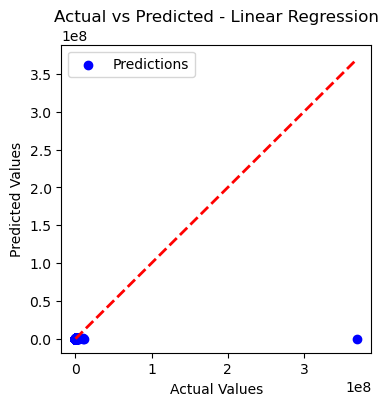

Model: Ridge Regression
Train R^2: 0.0060
Test R^2: 0.0011
Test RMSE: 2054967.2223
----------------------------------------


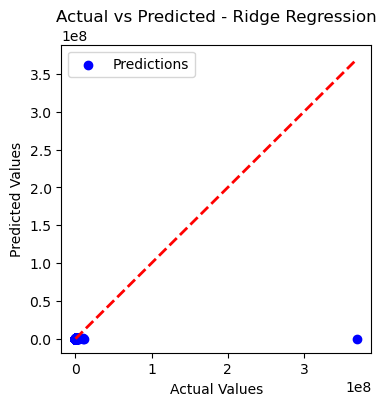

Model: Lasso Regression
Train R^2: 0.0060
Test R^2: 0.0011
Test RMSE: 2054967.2447
----------------------------------------


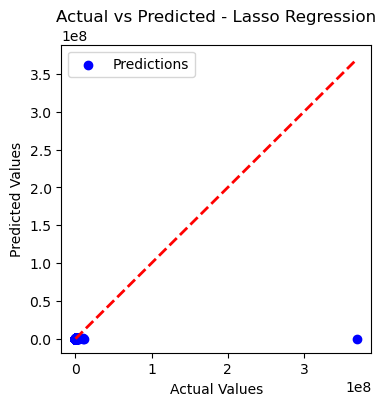

Model: Random Forest Regression
Train R^2: 0.8218
Test R^2: -0.0146
Test RMSE: 2071046.0129
----------------------------------------


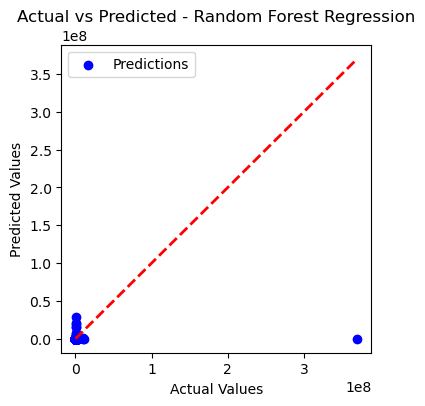

In [28]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

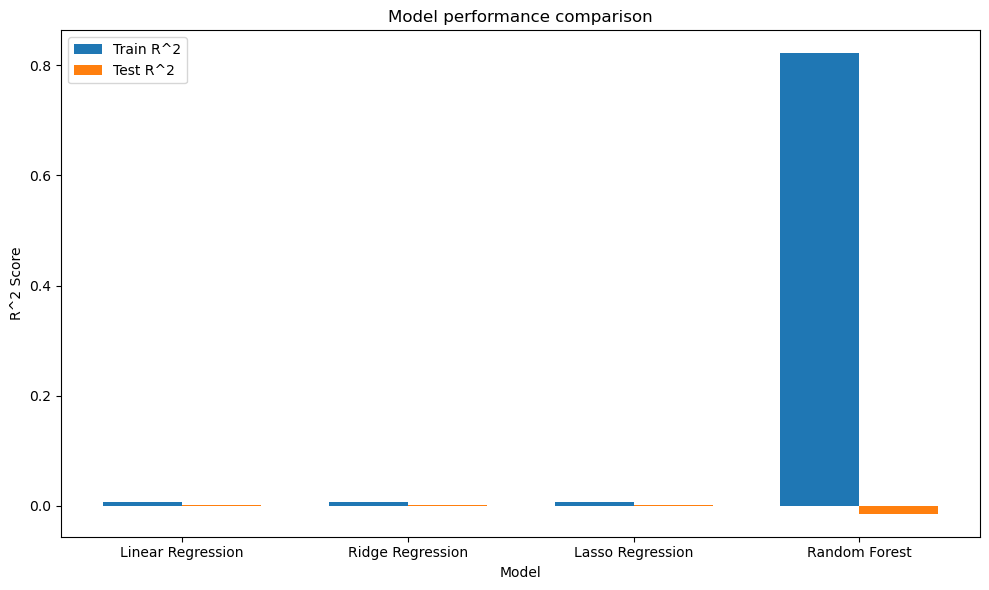

In [29]:
# Model comparison based on R^2 score for training and testing sets
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest']
train_scores = [
    r2_score(y_train, linear_reg.predict(X_train)),
    r2_score(y_train, ridge_reg.predict(X_train)),
    r2_score(y_train, lasso_reg.predict(X_train)),
    r2_score(y_train, rf_reg.predict(X_train))
]
test_scores = [
    r2_score(y_test, linear_reg.predict(X_test)),
    r2_score(y_test, ridge_reg.predict(X_test)),
    r2_score(y_test, lasso_reg.predict(X_test)),
    r2_score(y_test, rf_reg.predict(X_test))
]

# Bar plot comparing R^2 score for all models
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.35

bar1 = ax.bar(index, train_scores, bar_width, label='Train R^2')
bar2 = ax.bar(index + bar_width, test_scores, bar_width, label='Test R^2')

ax.set_xlabel('Model')
ax.set_ylabel('R^2 Score')
ax.set_title('Model performance comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

In [30]:
df_clean_en_noNaN_med.shape

(163174, 20)

**Conclusiones**

No pude encontrar mejores correlaciones, lamentablemente se me acabo el tiempo para arreglar las coras importantes.

El random forest lanza buenos resultados en entrenamiento pero al probarlo vuelve a los valores de sus homologos. Estare investigando para detallar eso.